In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# get price data from yfinance
company = 'INFY.NS'
start_date = '2014-06-01'
end_date = '2024-08-03'
yf_data = yf.download(company, start=start_date, end = end_date)
yf_data = yf_data.resample('D').ffill()
yf_data = pd.DataFrame(yf_data['Close'])

[*********************100%%**********************]  1 of 1 completed


In [3]:
data_quarter = pd.read_excel("../../data/Infosys.xlsx", skiprows=40, sheet_name = "Data Sheet", nrows=10)
data_quarter = data_quarter.T

# update header
new_header = data_quarter.iloc[0] #grab the first row for the header
data_quarter = data_quarter[1:] #take the data less the header row
data_quarter.columns = new_header #set the header row as the df header


In [21]:
data_quarter['Date'] = pd.to_datetime(data_quarter.index)

data_quarter = data_quarter.set_index(data_quarter['Date'])

data_quarter = data_quarter.dropna(axis=1)

In [22]:
# Add price to the data frame
price = yf_data.loc[data_quarter['Date']]['Close']
price.values
data_quarter['Close'] = price.values

In [23]:
data_quarter = data_quarter.drop(columns=["Date"])
data_quarter

Report Date,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit,Close
Date,,,,,,,,,,
2022-03-31,32276,24430,637,890,50,7543,1848,5686,7846,1906.849976
2022-06-30,34470,26606,676,950,56,7534,2172,5360,7864,1461.900024
2022-09-30,36538,27636,584,1029,66,8391,2365,6021,8902,1413.449951
2022-12-31,38318,28951,769,1125,80,8931,2345,6586,9367,1508.199951
2023-03-31,37441,28443,671,1121,82,8466,2332,6128,8998,1427.949951
2023-06-30,37933,28869,561,1173,90,8362,2417,5945,9064,1335.500000
2023-09-30,38994,29554,632,1166,138,8768,2553,6212,9440,1435.449951
2023-12-31,38821,29684,789,1176,131,8619,2506,6106,9137,1542.900024
2024-03-31,37923,29139,2729,1163,110,10240,2265,7969,8784,1498.050049


In [24]:
data_quarter.columns

Index(['Sales', 'Expenses', 'Other Income', 'Depreciation', 'Interest',
       'Profit before tax', 'Tax', 'Net profit', 'Operating Profit', 'Close'],
      dtype='object', name='Report Date')

In [25]:
data_quarter.dtypes

Report Date
Sales                 object
Expenses              object
Other Income          object
Depreciation          object
Interest              object
Profit before tax     object
Tax                   object
Net profit            object
Operating Profit      object
Close                float64
dtype: object

In [26]:
# Problem = create a percentage change for each column and then create a heat map. 
pl = pd.DataFrame()
for col in data_quarter:
    # print(col)
    pl[col] = data_quarter[col].pct_change()*100

In [102]:
pl = pl.dropna().round(2)

<Axes: ylabel='Date'>

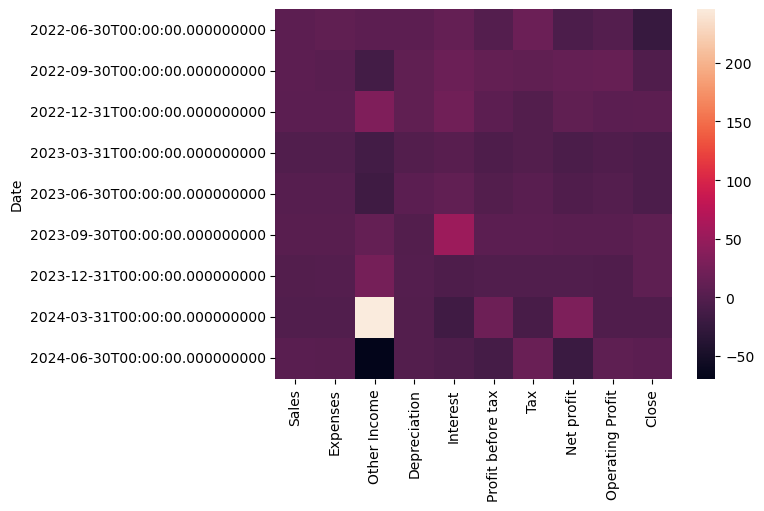

In [105]:

# sns.color_palette("YlOrBr", as_cmap=True)
# sns.heatmap(pl.dropna(), cmap='YlOrRd')
sns.heatmap(pl)

In [110]:
pl.style.highlight_max(color = 'green', axis = 0).highlight_min(color = 'red', axis = 0)


,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit,Close
Date,,,,,,,,,,
2022-06-30 00:00:00,6.800000,8.910000,6.120000,6.740000,12.000000,-0.120000,17.530000,-5.730000,0.230000,-23.330000
2022-09-30 00:00:00,6.000000,3.870000,-13.610000,8.320000,17.860000,11.380000,8.890000,12.330000,13.200000,-3.310000
2022-12-31 00:00:00,4.870000,4.760000,31.680000,9.330000,21.210000,6.440000,-0.850000,9.380000,5.220000,6.700000
2023-03-31 00:00:00,-2.290000,-1.750000,-12.740000,-0.360000,2.500000,-5.210000,-0.550000,-6.950000,-3.940000,-5.320000
2023-06-30 00:00:00,1.310000,1.500000,-16.390000,4.640000,9.760000,-1.230000,3.640000,-2.990000,0.730000,-6.470000
2023-09-30 00:00:00,2.800000,2.370000,12.660000,-0.600000,53.330000,4.860000,5.630000,4.490000,4.150000,7.480000
2023-12-31 00:00:00,-0.440000,0.440000,24.840000,0.860000,-5.070000,-1.700000,-1.840000,-1.710000,-3.210000,7.490000
2024-03-31 00:00:00,-2.310000,-1.840000,245.880000,-1.110000,-16.030000,18.810000,-9.620000,30.510000,-3.860000,-2.910000
2024-06-30 00:00:00,3.670000,2.540000,-69.290000,-1.200000,-4.550000,-11.900000,16.870000,-20.090000,7.430000,4.590000


In [63]:
# correlation 
corr = pl.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit,Close
Sales,1.00,0.94,-0.47,0.71,0.48,-0.05,0.76,-0.21,0.75,-0.25
Expenses,0.94,1.00,-0.39,0.70,0.41,-0.09,0.73,-0.24,0.48,-0.44
Other Income,-0.47,-0.39,1.00,-0.21,-0.34,0.79,-0.71,0.85,-0.47,-0.02
Depreciation,0.71,0.70,-0.21,1.00,0.27,0.24,0.23,0.14,0.48,-0.31
Interest,0.48,0.41,-0.34,0.27,1.00,0.08,0.26,-0.02,0.44,0.17
Profit before tax,-0.05,-0.09,0.79,0.24,0.08,1.00,-0.54,0.98,0.05,-0.01
Tax,0.76,0.73,-0.71,0.23,0.26,-0.54,1.00,-0.68,0.54,-0.37
Net profit,-0.21,-0.24,0.85,0.14,-0.02,0.98,-0.68,1.00,-0.08,0.07
Operating Profit,0.75,0.48,-0.47,0.48,0.44,0.05,0.54,-0.08,1.00,0.19
Close,-0.25,-0.44,-0.02,-0.31,0.17,-0.01,-0.37,0.07,0.19,1.00


In [64]:
corr = corr.round(2)
corr = corr[:-1]
corr

,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit,Close
Sales,1.00,0.94,-0.47,0.71,0.48,-0.05,0.76,-0.21,0.75,-0.25
Expenses,0.94,1.00,-0.39,0.70,0.41,-0.09,0.73,-0.24,0.48,-0.44
Other Income,-0.47,-0.39,1.00,-0.21,-0.34,0.79,-0.71,0.85,-0.47,-0.02
Depreciation,0.71,0.70,-0.21,1.00,0.27,0.24,0.23,0.14,0.48,-0.31
Interest,0.48,0.41,-0.34,0.27,1.00,0.08,0.26,-0.02,0.44,0.17
Profit before tax,-0.05,-0.09,0.79,0.24,0.08,1.00,-0.54,0.98,0.05,-0.01
Tax,0.76,0.73,-0.71,0.23,0.26,-0.54,1.00,-0.68,0.54,-0.37
Net profit,-0.21,-0.24,0.85,0.14,-0.02,0.98,-0.68,1.00,-0.08,0.07
Operating Profit,0.75,0.48,-0.47,0.48,0.44,0.05,0.54,-0.08,1.00,0.19


In [87]:
# corr[corr['Close']> 0.7][:-1].index[0]

corr['Close'].max(), corr['Close'].min()
positive_corr_col = corr[corr['Close'] == corr['Close'].max()].index[0]
negative_corr_col = corr[corr['Close'] == corr['Close'].min()].index[0]
negative_corr_col

'Expenses'

In [89]:
corr[negative_corr_col].values

array([ 0.94,  1.  , -0.39,  0.7 ,  0.41, -0.09,  0.73, -0.24,  0.48])

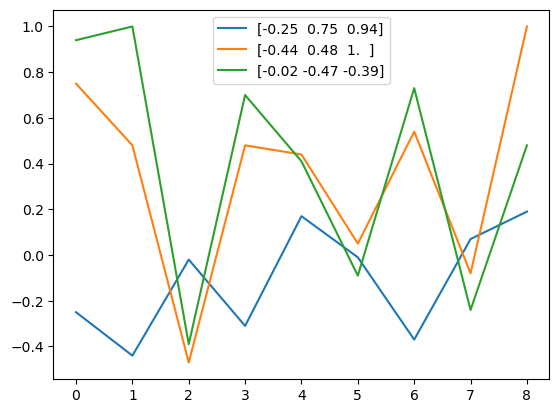

In [90]:
a = corr[['Close', positive_corr_col, negative_corr_col]].values
plt.plot(a)
plt.legend(a)

In [97]:
pd.DataFrame(a, columns= ['Close', 'positive', 'negative'])

,Close,positive,negative
0,-0.25,0.75,0.94
1,-0.44,0.48,1.00
2,-0.02,-0.47,-0.39
3,-0.31,0.48,0.70
4,0.17,0.44,0.41
5,-0.01,0.05,-0.09
6,-0.37,0.54,0.73
7,0.07,-0.08,-0.24
8,0.19,1.00,0.48


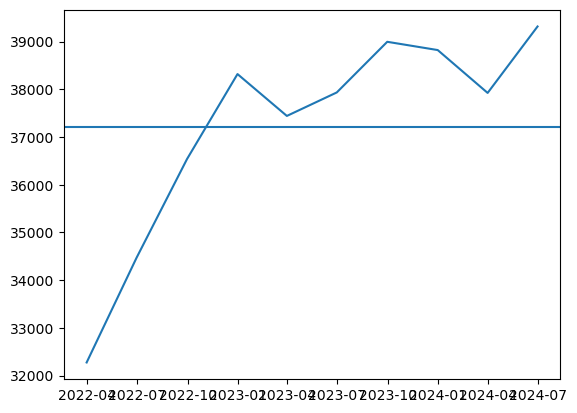

In [124]:
plt.plot(data_quarter['Sales'])
plt.axhline(data_quarter['Sales'].mean())

In [116]:
data_quarter['Sales'].mean())

37202.9